In [23]:
import scipy.io
import scprep
import seaborn as sns

In [2]:
df = scipy.io.loadmat("../data/ipsc/ipscData.mat")

In [4]:
df.keys()

dict_keys(['__header__', '__version__', '__globals__', 'channel_names', 'data', 'data_time'])

In [5]:
X = df['data']

(220450, 33)

In [20]:
import numpy as np
n_points = 2000
rand_idx = np.random.choice(np.arange(df['data'].shape[0]), size=n_points, replace=False)
X= df["data"][rand_idx]
y = df["data_time"][rand_idx]

In [21]:
import phate
phate_op = phate.PHATE(knn_max = 25, n_jobs=2, verbose = False, t = "auto")
data_phate_pca = phate_op.fit_transform(X,t_max = 500)

<Axes: title={'center': 'c_oIPRCb'}, xlabel='PHATE1', ylabel='PHATE2'>

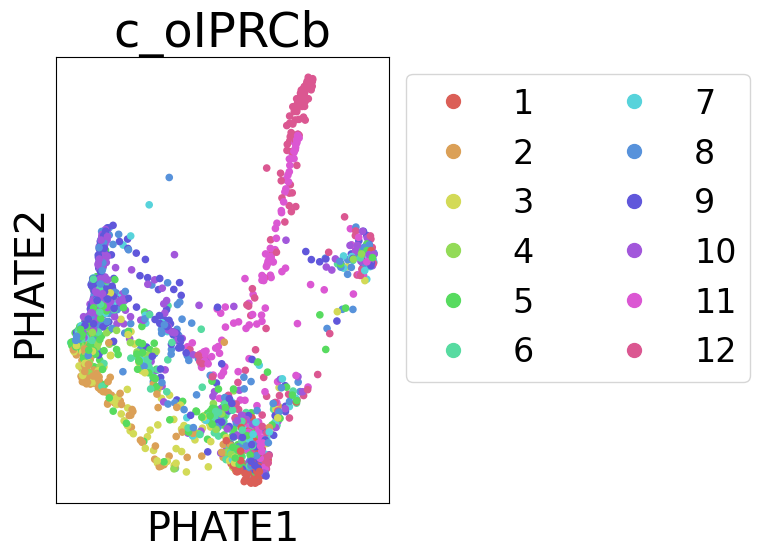

In [25]:
scprep.plot.scatter2d(data_phate_pca, c=y, figsize=(8,6), s= 20, 
                        cmap = sns.color_palette("hls", len(np.unique(y))), fontsize=20,
                        ticks=False, label_prefix="PHATE", legend_anchor=(1,1), 
                        title= "c_oIPRCb", ax = None)